In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import data set

survey_data=pd.read_csv("../NIHMS50746-supplement-AZ_chemsurvey_QED.csv")
df=pd.read_csv("../PubChemData.csv")
df

,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED
0,385.329,-3.33260,11.0,4.0,171.16,3.0,0.0,1.0,0.358060
1,328.543,5.55762,3.0,0.0,34.14,11.0,1.0,2.0,0.393888
2,404.151,-7.82110,5.0,3.0,118.28,4.0,0.0,1.0,0.402707
3,280.799,-1.16110,1.0,2.0,41.63,3.0,2.0,0.0,0.731770
4,248.257,2.14680,2.0,0.0,40.62,1.0,1.0,1.0,0.714356
...,...,...,...,...,...,...,...,...,...
99875,262.302,0.01120,6.0,2.0,77.38,3.0,0.0,0.0,0.745917
99876,218.256,0.31740,4.0,0.0,40.16,2.0,0.0,2.0,0.494069
99877,670.848,2.97110,9.0,5.0,158.69,14.0,2.0,0.0,0.203831
99878,113.204,1.53690,1.0,1.0,12.03,0.0,0.0,0.0,0.502149


In [3]:
# Filter out DES columns

survey_data = survey_data.filter(['DO_CHEMISTRY','CHEMISTRY_COMMENT','MW', 'ALOGP', 'HBD', 'HBA', 'PSA', 'ROTB', 'AROM', 'ALERTS', 'UNWEIGHTED_QED', 'QED'], axis = 1)
survey_data

,DO_CHEMISTRY,CHEMISTRY_COMMENT,MW,ALOGP,HBD,HBA,PSA,ROTB,AROM,ALERTS,UNWEIGHTED_QED,QED
0,YES,-,287.41974,4.746,1,2,57.34,7,2,1,0.799,0.747
1,YES,-,333.40536,2.282,1,6,98.64,6,2,2,0.692,0.643
2,YES,-,296.77581,2.270,1,4,85.11,4,2,1,0.895,0.877
3,YES,-,311.37494,4.105,1,4,47.56,6,2,1,0.859,0.816
4,YES,-,297.34836,3.414,1,4,47.56,5,2,1,0.899,0.859
...,...,...,...,...,...,...,...,...,...,...,...,...
17112,NO,too simple,229.27440,3.200,1,2,42.23,2,2,0,0.888,0.859
17113,NO,too simple,229.27440,3.200,1,2,42.23,2,2,0,0.888,0.859
17114,NO,too simple,199.20535,1.946,0,2,43.10,3,2,2,0.688,0.560
17115,NO,too simple,255.70229,2.825,0,3,38.67,2,3,0,0.734,0.707


In [4]:
# Lipinski function

def lipinski(MW, ALOGP, HBD, HBA):
    strike = 0
    if MW > 500:
        strike = strike + 1
    if ALOGP > 5:
        strike = strike + 1
    if HBD > 5:
        strike = strike + 1
    if HBA > 10:
        strike = strike + 1
    if strike > 1:
        return 'Not Drug-like'
    else: 
        return 'Drug-like'

In [5]:
# Run function on all rows

lip = []
for i in range(0, len(df)):
    lip.append(lipinski(df.loc[i,'MW'], df.loc[i,'ALOGP'], df.loc[i,'HBD'], df.loc[i,'HBA']))

In [6]:
# Create new Lipinski feature

df['Lipinski'] = lip
df

,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski
0,385.329,-3.33260,11.0,4.0,171.16,3.0,0.0,1.0,0.358060,Drug-like
1,328.543,5.55762,3.0,0.0,34.14,11.0,1.0,2.0,0.393888,Drug-like
2,404.151,-7.82110,5.0,3.0,118.28,4.0,0.0,1.0,0.402707,Drug-like
3,280.799,-1.16110,1.0,2.0,41.63,3.0,2.0,0.0,0.731770,Drug-like
4,248.257,2.14680,2.0,0.0,40.62,1.0,1.0,1.0,0.714356,Drug-like
...,...,...,...,...,...,...,...,...,...,...
99875,262.302,0.01120,6.0,2.0,77.38,3.0,0.0,0.0,0.745917,Drug-like
99876,218.256,0.31740,4.0,0.0,40.16,2.0,0.0,2.0,0.494069,Drug-like
99877,670.848,2.97110,9.0,5.0,158.69,14.0,2.0,0.0,0.203831,Drug-like
99878,113.204,1.53690,1.0,1.0,12.03,0.0,0.0,0.0,0.502149,Drug-like


### Engineering the Veber feature
The rules for the <a href="https://sci-hub.st/10.1021/jm020017n" target="_blank">Verber metric</a> of drug likeness is defined as such: a molecule has a high probability of good oral bioavailability (and hence druglike) if it has
1) 10 or fewer roatable bonds

2) 12 or fewer H-bond donors and acceptors

In [7]:
# Veber function
def veber(HBD,HBA,ROTB):
    if HBD+HBA<=12:
        if ROTB<=10:
            return "Drug-like"
        else: return "Not Drug-like"
    else: return "Not Drug-like"

In [8]:
# Create new Veber feature as a list
veb = []
for i in range(0, len(df)):
    veb.append(veber(df.loc[i,'HBD'], df.loc[i,'HBA'], df.loc[i,'ROTB']))

In [9]:
# Add Veber list to the dataframe
df['Veber']=veb
df

,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,QED,Lipinski,Veber
0,385.329,-3.33260,11.0,4.0,171.16,3.0,0.0,1.0,0.358060,Drug-like,Not Drug-like
1,328.543,5.55762,3.0,0.0,34.14,11.0,1.0,2.0,0.393888,Drug-like,Not Drug-like
2,404.151,-7.82110,5.0,3.0,118.28,4.0,0.0,1.0,0.402707,Drug-like,Drug-like
3,280.799,-1.16110,1.0,2.0,41.63,3.0,2.0,0.0,0.731770,Drug-like,Drug-like
4,248.257,2.14680,2.0,0.0,40.62,1.0,1.0,1.0,0.714356,Drug-like,Drug-like
...,...,...,...,...,...,...,...,...,...,...,...
99875,262.302,0.01120,6.0,2.0,77.38,3.0,0.0,0.0,0.745917,Drug-like,Drug-like
99876,218.256,0.31740,4.0,0.0,40.16,2.0,0.0,2.0,0.494069,Drug-like,Drug-like
99877,670.848,2.97110,9.0,5.0,158.69,14.0,2.0,0.0,0.203831,Drug-like,Not Drug-like
99878,113.204,1.53690,1.0,1.0,12.03,0.0,0.0,0.0,0.502149,Drug-like,Drug-like


### Exploratory Data Analysis

In [10]:
# Begin EDA ...

df['Lipinski'].value_counts()

Drug-like        90507
Not Drug-like     9373
Name: Lipinski, dtype: int64

In [11]:
df['Veber'].value_counts()

Drug-like        86009
Not Drug-like    13871
Name: Veber, dtype: int64

In [12]:
# df[df['QED'] > 0.67]
# DOCHEM=df[df['DO_CHEMISTRY'] == 'YES']
# DOCHEM['QED'].mean()

In [20]:
df['QED'].mean()

0.5227276154576835

In [14]:
# mean QED for rows that fail Lipinski test
not_drug = df[df['Lipinski'] == 'Not Drug-like']
not_drug['QED'].mean()

0.14915748021691463

In [15]:
# mean QED for rows that pass Lipinski test
drug = df[df['Lipinski'] == 'Drug-like']
drug['QED'].mean()

0.5614149311085344

In [16]:
# mean QED for rows that fail Veber test
not_drug = df[df['Veber'] == 'Not Drug-like']
not_drug['QED'].mean()

0.20416751655411094

In [17]:
# mean QED for rows that pass Veber test
drug = df[df['Veber'] == 'Drug-like']
drug['QED'].mean()

0.5741030195652921

array([[<AxesSubplot:title={'center':'QED'}>]], dtype=object)

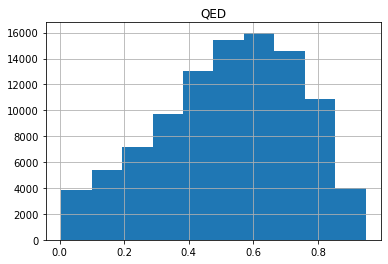

In [21]:
df.hist(column='QED')